# Appendix E
examine high population, high diversity, and mid to high income communities

In [1]:
import os, glob
import numpy as np
import astropy.table as aTable
import geopandas

In [2]:
import corner as DFM
# --- plotting ---
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

## read compiled dataset

In [4]:
data = aTable.Table.read('../dat/zipcode.fema.fsf.acs.rainfall.v2.csv', format='csv')
print('%i entries; %i unique zipcodes' % (len(data), len(np.unique(data['reportedZipcode']))))

74288 entries; 14729 unique zipcodes


select high population, high diversity, and mid+high income

In [5]:
high_pop = (data['population'] > 7.5e4)
high_diversity = (data['white_fraction'] < 0.7)
mid_to_high_inc = (data['median_household_income'] > 5e4)

cut = high_pop & high_diversity & mid_to_high_inc

In [8]:
# https://github.com/joncutrer/geopandas-tutorial/blob/master/data/usa-states-census-2014.shp
states = geopandas.read_file('../dat/usa-states-census-2014.shp')

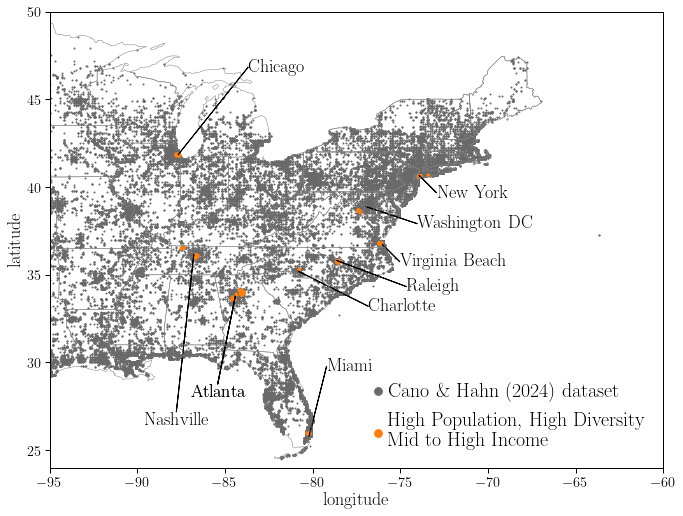

In [13]:
xlim = (-95, -60)
ylim = (24, 50) 

fig = plt.figure(figsize=(11,12))
sub = fig.add_subplot(111)

states.boundary.plot(ax=sub, color='gray',linewidth=0.5)

sub.scatter(data['longitude'], data['latitude'], c='dimgrey', s=1)#, rasterized=True)
sub.scatter(data['longitude'][cut], data['latitude'][cut], c='C1', s=10)#, rasterized=True)

# label major cities 
# new york
sub.arrow(-73.940, 40.670, 1, -1)
sub.text(-72.940, 39.670, 'New York', ha='left', va='center', fontsize=18)

# chicago
sub.arrow(-87.680, 41.840, 4, 5)
sub.text(-83.680, 46.840, 'Chicago', ha='left', va='center', fontsize=18)


# DC
sub.arrow(-77.037, 38.907, 3, -1)
sub.text(-74.037, 37.907, 'Washington DC', ha='left', va='center', fontsize=18)

# miami #36.740	-76.040
sub.arrow(-76.040, 36.740, 1, -1)
sub.text(-75.040, 35.740, 'Virginia Beach', ha='left', va='center', fontsize=18)


# miami
sub.arrow(-80.210, 25.780, 1, 4)
sub.text(-79.210, 29.780, 'Miami', ha='left', va='center', fontsize=18)

# Raleigh
sub.arrow(-78.660, 35.820, 4, -1.5)
sub.text(-74.660, 34.320, 'Raleigh', ha='left', va='center', fontsize=18)

# charlotte	35.200	-80.830
sub.arrow(-80.830, 35.200, 4, -2)
sub.text(-76.8300, 33.200, 'Charlotte', ha='left', va='center', fontsize=18)

# atlanta	33.760	-84.420
sub.arrow(-84.420, 33.760, -1, -5)
sub.text(-85.420, 28.760, 'Atlanta', ha='center', va='top', fontsize=18)

# atlanta	33.760	-84.420
sub.arrow(-84.420, 33.760, -1, -5)
sub.text(-85.420, 28.760, 'Atlanta', ha='center', va='top', fontsize=18)

#	Nashville	546000	36.170	-86.780
sub.arrow(-86.780, 36.170, -1, -9)
sub.text(-87.780, 27.170, 'Nashville', ha='center', va='top', fontsize=18)

sub.set_xlabel('longitude', fontsize=18)
sub.set_ylabel('latitude', fontsize=18)
sub.set_xlim(xlim)
sub.set_ylim(ylim)
#sub.scatter([], [], c='k', s=60, label='FEMA NFIP Redacted Claims')
sub.scatter([], [], c='dimgrey', s=60, label=r'Cano \& Hahn (2024) dataset')
sub.scatter([], [], c='C1', s=60, label=r'High Population, High Diversity'+'\n'+'Mid to High Income')
sub.legend(loc='lower right', handletextpad=-0.5, fontsize=20)


sub.spines['top'].set_linewidth(1)
sub.spines['right'].set_linewidth(1)
sub.spines['bottom'].set_linewidth(1)
sub.spines['left'].set_linewidth(1)
sub.tick_params(width=1)

#sub.axis('off')
# sub.set_xticks([])
# sub.set_yticks([])
fig.savefig('urban.pdf', bbox_inches='tight')